Name : Dilshan J.V.A.P

Index number : 190144D

Exercise 10

x=  -2.4003994283530288 f(x) =  -53.11840483760499
x=  2.5104174088324025 f(x) =  -9.073558171240812
x=  -0.29497479850285213 f(x) =  -0.43550699945570187
x=  0.09129371545369486 f(x) =  6.2686997952779855


Text(0.5, 1.0, 'ILearning rate x=0.008')

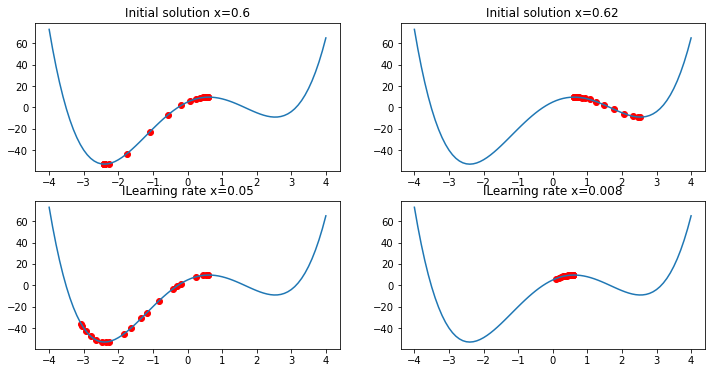

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([x**i*w[M-i] for i in range(0,M+1)], axis=0)

def g(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([i*x**(i-1)*w[M-i] for i in range(0,M+1)], axis=0)

def minimum(x,alpha):
    # alpha = 0.02
    # x = 0.6
    x_hist = np.array(x)
    fx_hist = np.array(f(x))
    for i in range(20):
        x = x - alpha*g(x)
        x_hist= np.append(x_hist, x)
        fx_hist= np.append(fx_hist, f(x))
    print('x= ',x,'f(x) = ',f(x))
    return x_hist,fx_hist

#fig = plt.figure(figsize = (12,6))
fig,ax = plt.subplots(2,2,figsize=(12,6))

delta = 0.1
x_ = np.arange(-4,4+delta,delta)
ax[0,0].plot(x_,f(x_))
x_hist,fx_hist=minimum(0.6,0.02)
ax[0,0].scatter(x_hist,fx_hist, c='r')
ax[0,0].set_title("Initial solution x=0.6")

delta = 0.1
x_ = np.arange(-4,4+delta,delta)
ax[0,1].plot(x_,f(x_))
x_hist,fx_hist=minimum(0.62,0.02)
ax[0,1].scatter(x_hist,fx_hist, c='r')
ax[0,1].set_title("Initial solution x=0.62")

delta = 0.1
x_ = np.arange(-4,4+delta,delta)
ax[1,0].plot(x_,f(x_))
x_hist,fx_hist=minimum(0.6,0.05)
ax[1,0].scatter(x_hist,fx_hist, c='r')
ax[1,0].set_title("ILearning rate x=0.05")

delta = 0.1
x_ = np.arange(-4,4+delta,delta)
ax[1,1].plot(x_,f(x_))
x_hist,fx_hist=minimum(0.6,0.008)
ax[1,1].scatter(x_hist,fx_hist, c='r')
ax[1,1].set_title("ILearning rate x=0.008")


In [10]:
# finding a root close to x0
from scipy.optimize import fsolve
from scipy.optimize import minimize

x0=0.7
root = fsolve(g,x0) #gradient is zero ath this point
print(root)

#Using scipy to find minimum
minimum = minimize(f,x0)
print(minimum)


[0.61654501]
      fun: -9.083837308516003
 hess_inv: array([[0.02625725]])
      jac: array([-7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([2.53385793])


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib . pyplot as plt
from tensorflow.keras.datasets import cifar10 , mnist

(x_train , y_train) , (x_test , y_test) = cifar10.load_data()
# ( x_train , y_train ) , ( x_test , y_tes t ) = mnist . load_data ( )
print ( " x_train => " , x_train . shape )

Ntr = x_train . shape [ 0 ]
Nte = x_test . shape [ 0 ]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train [ range (Ntr ) , : ]
x_test = x_test [ range (Nte ) , : ]
y_train = y_train [ range (Ntr ) ]
y_test = y_test [ range (Nte ) ]

K = len(np.unique(y_train))

y_train = tf.keras.utils.to_categorical(y_train, num_classes = K)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=K)

x_train = np.reshape(x_train, (Ntr, Din))
x_test = np.reshape(x_test, (Nte, Din))
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train /= 255.
x_test /= 255.




 x_train =>  (50000, 32, 32, 3)


In [ ]:
# Utility function for diaplaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)


     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)

In [ ]:
std = 1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
lr = 1e-3
lr_decay = 0.1
epochs = 11
batch_size = 1000
loss_hist = []
rng = np.random.default_rng(seed = 0)

for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]

        #forward pass
        y_pred = x@w + b
        loss = 1./batch_size*np.square(y_pred-y).sum()
        loss_hist.append(loss)

        #backward pass
        dy_pred = 1./batch_size* (2.0*(y_pred - y))
        dw = x.T @ dy_pred
        db = dy_pred.sum(axis = 0)*1
        w = w - lr*dw #dw is daba L/daba w
        b = b - lr*db

    if e % 5 == 0:
        print("Iteration %d / %d: loss %f"%(e, epochs,loss))
    if e % 10 == 0:
        lr *= lr_decay

Iteration 0 / 11: loss 0.850458
Iteration 5 / 11: loss 0.836765
Iteration 10 / 11: loss 0.834906


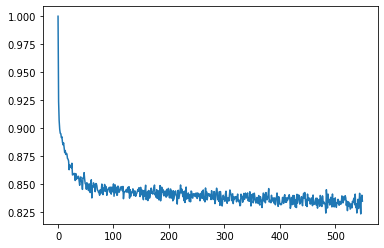

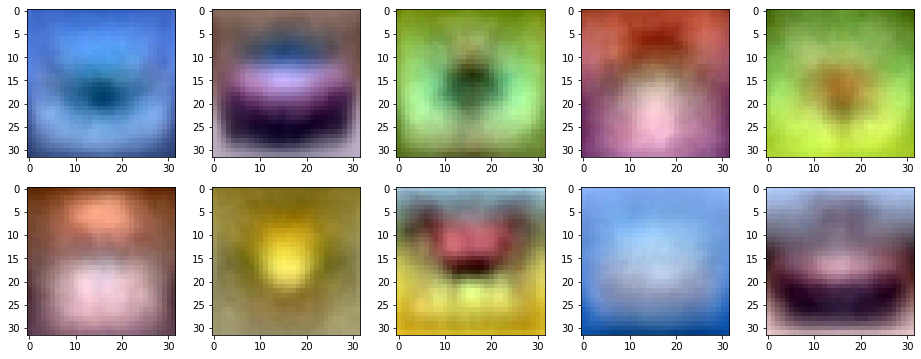

train_acc =  0.33576
test_acc =  0.3354


In [ ]:
y_train_pred = x_train.dot(w) + b
y_test_pred = x_test.dot(w) + b
display(y_train, y_test, y_train_pred, y_test_pred, loss_hist, w, showim = True)